In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [2]:
plt.style.use('ggplot')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Reading Data

In [4]:
df = pd.read_csv(r'Amazon_DataSet.csv')

In [5]:
df.head()

,reviewText,Sentiment
0,This is a one of the best apps acording to a b...,Positive
1,This is a pretty good version of the game for ...,Positive
2,this is a really cool game. there are a bunch ...,Positive
3,"This is a silly game and can be frustrating, b...",Positive
4,This is a terrific game on any pad. Hrs of fun...,Positive


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

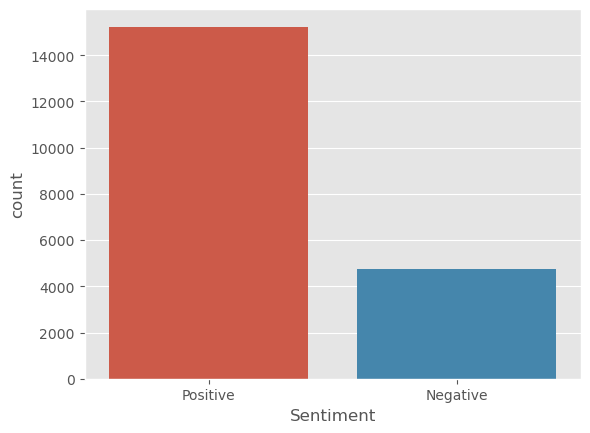

In [7]:
sns.countplot(x=df["Sentiment"])

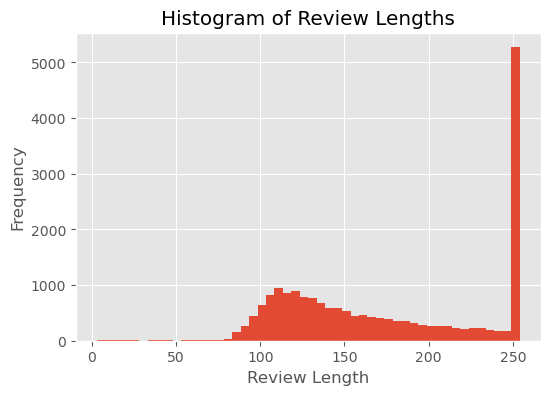

In [9]:
plt.figure(figsize = (6, 4))
df["length"] = df["reviewText"].apply(lambda x: len(x))
df["length"].hist(bins = 50)
plt.title("Histogram of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# Pre_Processing

**Numerical Normalization**

In [10]:
df["Sentiment"] = (df["Sentiment"] == "Positive").astype(int)

In [11]:
df.head()

,reviewText,Sentiment,length
0,This is a one of the best apps acording to a b...,1,129
1,This is a pretty good version of the game for ...,1,129
2,this is a really cool game. there are a bunch ...,1,96
3,"This is a silly game and can be frustrating, b...",1,105
4,This is a terrific game on any pad. Hrs of fun...,1,117


# Sentence Normalization

1.   **Cleaning data**
2.   **Removing stopwords**
3.   **Stemming**

Cleaning data:

1. Convert the text to lowercase
2. Remove any non-alphanumeric characters (excluding whitespace) from the
   lowercased text and This step removes punctuation and special characters.

In [13]:
import re
def normalize_texts(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower()
        normalized_texts.append(re.sub(r'[^\w\s]', '', lower))
    return normalized_texts

df['reviewText'] = normalize_texts(df['reviewText'])

In [14]:
df['reviewText']

0        one best app acord bunch peopl agre bomb egg p...
1        pretti good version game free lot differ level...
2        realli cool game bunch level find golden egg s...
3        silli game frustrat lot fun definit recommend ...
4        terrif game pad hrs fun grandkid love great en...
                               ...                        
19995    app fricken stupidit froze kindl wont allow pl...
19996    pleas add need neighbor ginger1016 thank bunch...
19997    love game awesom wish free stuff hous didnt co...
19998    love love love app side fashion stori fight wo...
19999    game rip list thing make betterbul first need ...
Name: reviewText, Length: 20000, dtype: object

In [16]:
tokens = df['reviewText'].apply(word_tokenize)

Removing stopwords and stemming:

  1. It initializes a set of stopwords using stopwords.words('english'). This set contains common English words like "the," "and," "is," etc., which are considered stopwords and typically removed from text during NLP tasks.

  2. It creates an instance of the SnowballStemmer class with the language set to 'english'. Stemming is the process of reducing words to their base or root form. The SnowballStemmer uses the Snowball algorithm for stemming.

In [17]:
def remove_stopwords_and_stemming(tokens):
    stop_words = set(stopwords.words('english'))
    stemmer = nltk.stem.snowball.SnowballStemmer("english")
    filtered_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_tokens)
    return filtered_sentence
df['reviewText'] = tokens.apply(remove_stopwords_and_stemming)

In [18]:
df['reviewText']

0        one best app acord bunch peopl agre bomb egg p...
1        pretti good version game free lot differ level...
2        realli cool game bunch level find golden egg s...
3        silli game frustrat lot fun definit recommend ...
4        terrif game pad hrs fun grandkid love great en...
                               ...                        
19995    app fricken stupidit froze kindl wont allow pl...
19996    pleas add need neighbor ginger1016 thank bunch...
19997    love game awesom wish free stuff hous didnt co...
19998    love love love app side fashion stori fight wo...
19999    game rip list thing make betterbul first need ...
Name: reviewText, Length: 20000, dtype: object

# Splitting Data

In [20]:
train, test = np.split(df.sample(frac=1), [int(0.8*len(df))])

In [21]:
def get_labels_and_texts(dataframe):
    labels = []
    texts = []
    labels = dataframe['Sentiment']
    texts = dataframe['reviewText']
    return np.array(labels), texts
train_labels, train_texts = get_labels_and_texts(train)
test_labels, test_texts = get_labels_and_texts(test)


# Sentence Vectorization

1.    **CountVectorizing :**
> converts text documents into numerical vectors based on word frequencies, enabling machine learning algorithms to process the data effectively. It represents each document as a vector where each element corresponds to the count of a unique word or term from the vocabulary.




In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [23]:
x_train = cv.fit_transform(train_texts)
x_train

<16000x16078 sparse matrix of type '<class 'numpy.int64'>'
	with 246072 stored elements in Compressed Sparse Row format>

In [25]:
pd.DataFrame.sparse.from_spmatrix(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16029,16030,16031,16032,16033,16034,16035,16036,16037,16038
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x_test = cv.transform(test_texts)
x_test

<4000x16078 sparse matrix of type '<class 'numpy.int64'>'
	with 58975 stored elements in Compressed Sparse Row format>

In [29]:
pd.DataFrame.sparse.from_spmatrix(x_test)

,0,1,2,3,4,5,6,7,8,9,...,16029,16030,16031,16032,16033,16034,16035,16036,16037,16038
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2.    **TF-IDF Vectorization :**

> Represents text documents as numerical vectors by considering both term frequency (TF) and inverse document frequency (IDF). It assigns higher weights to words that are more informative within a document while downplaying common words that appear frequently across the entire corpus.








In [31]:
vectorizer = TfidfVectorizer(
    max_df= 0.5,
    min_df = 3
    )

In [32]:
x_train_tf = vectorizer.fit_transform(train_texts)
x_test_tf = vectorizer.transform(test_texts)

In [33]:
pd.DataFrame.sparse.from_spmatrix(x_train_tf)

,0,1,2,3,4,5,6,7,8,9,...,4368,4369,4370,4371,4372,4373,4374,4375,4376,4377
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
type(x_train_tf)

scipy.sparse._csr.csr_matrix

# Models

*   Training data with 8 diffrent models



In [37]:
import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [38]:
inference_time = {}
f1_score_val ={}

In [39]:
def efficiency_score(fi, inference_time, max_inference_time):

    # Normalize inference time by dividing it with maximum inference time across all models
    normalized_inference_time = 1 - (inference_time / max_inference_time)

    # Calculate Efficiency Score as weighted average of F1 score and normalized inference time
    efficiency_score = (0.7 * normalized_inference_time) + 0.3 * fi

    return efficiency_score

# 1.   svm

>Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It finds an optimal hyperplane that maximally separates data points of different classes or predicts continuous values based on their features.



In [40]:
from sklearn.svm import SVC

In [41]:
svm_model = SVC(
    verbose = True,
    random_state=1
)
start_time = time.time()

svm_model = svm_model.fit(x_train_tf, train_labels)
y_pred = svm_model.predict(x_test_tf)

end_time = time.time()

inference_time['SVM'] = round(end_time - start_time, 2)
f1_score_val['SVM'] = f1_score(test_labels, y_pred)

[LibSVM]

In [42]:
print(
    classification_report(
        test_labels.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)


              precision    recall  f1-score   support

    Negative       0.85      0.69      0.76       947
    Positive       0.91      0.96      0.94      3053

    accuracy                           0.90      4000
   macro avg       0.88      0.83      0.85      4000
weighted avg       0.90      0.90      0.89      4000



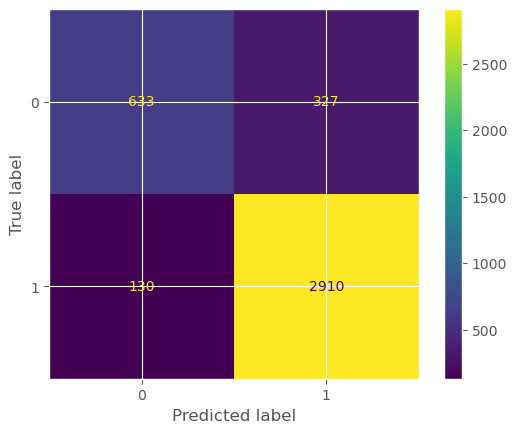

In [43]:
plot_confusion_matrix(svm_model, x_test, test_labels)

# 2. MLP classification

> Multilayer Perceptron (MLP) is a type of artificial neural network with multiple layers of nodes, including an input layer, one or more hidden layers, and an output layer. It is commonly used for various machine learning tasks such as classification and regression.



In [45]:
from sklearn.neural_network import MLPClassifier

In [46]:
mlp_model = MLPClassifier(
                 alpha=10e-5,
                 max_iter = 500,
)
start_time = time.time()

mlp_model.fit(x_train, train_labels)
y_pred = mlp_model.predict(x_test)

end_time = time.time()

inference_time['MLP'] = round(end_time - start_time, 2)
f1_score_val['MLP'] = f1_score(test_labels, y_pred)

In [47]:
print(
    classification_report(
        test_labels.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.74      0.73      0.74       947
    Positive       0.92      0.92      0.92      3053

    accuracy                           0.88      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.88      0.88      0.88      4000



F:\ana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


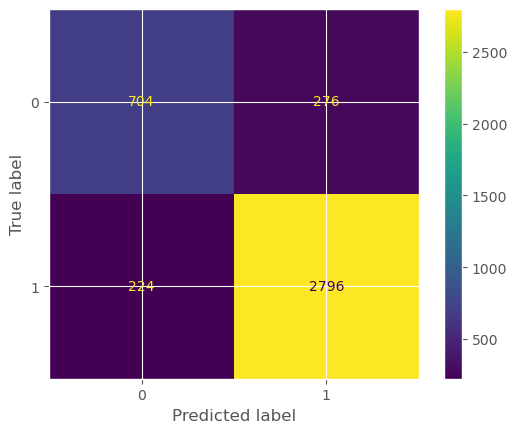

In [48]:
plot_confusion_matrix(mlp_model, x_test, test_labels)

#3. Logistic Regression

> Logistic Regression is a classification algorithm used to predict binary outcomes by fitting a logistic function to the input data. It estimates the probability of an event occurring based on the input features.



In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
log_model = LogisticRegression( random_state = 1)

start_time = time.time()

log_model.fit(x_train_tf, train_labels)
y_pred = log_model.predict(x_test_tf)

end_time = time.time()

inference_time[' LogisticRegression'] = round(end_time - start_time, 2)
f1_score_val[' LogisticRegression'] = f1_score(test_labels, y_pred)

In [52]:
print(
    classification_report(
        test_labels.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.87      0.68      0.76       965
    Positive       0.91      0.97      0.94      3035

    accuracy                           0.90      4000
   macro avg       0.89      0.83      0.85      4000
weighted avg       0.90      0.90      0.89      4000



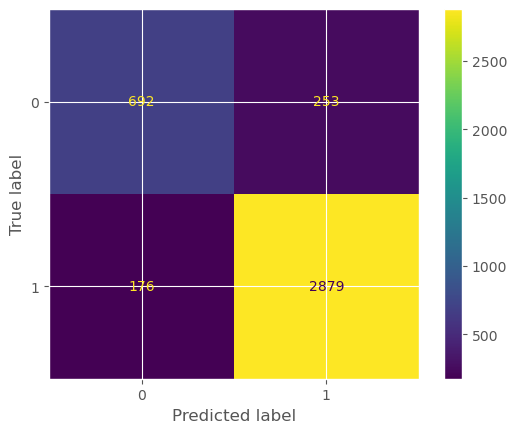

In [53]:
plot_confusion_matrix(log_model, x_test1, test_labels)

# 4.SGD

> SGDClassifier is a linear classifier in scikit-learn that uses the Stochastic Gradient Descent (SGD) optimization algorithm for training. It is efficient for large-scale machine learning tasks and supports various loss functions, making it suitable for both binary and multiclass classification problems.



In [55]:
from sklearn.linear_model import SGDClassifier

In [56]:
sgd_model = SGDClassifier(loss='log', penalty='l2', alpha=10e-5, max_iter=500, tol=None,  eta0=0.01)
start_time = time.time()

sgd_model.fit(x_train, train_labels)
y_pred = sgd_model.predict(x_test)

end_time = time.time()

inference_time['SGD'] = round(end_time - start_time, 2)
f1_score_val['SGD'] = f1_score(test_labels, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [57]:
print(
    classification_report(
        test_labels.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.82      0.75      0.78       965
    Positive       0.92      0.95      0.94      3035

    accuracy                           0.90      4000
   macro avg       0.87      0.85      0.86      4000
weighted avg       0.90      0.90      0.90      4000



In [58]:
inference_time

{'SVM': 3.72,
 'MLP': 0.01,
 ' LogisticRegression': 0.28,
 'SGD': 0.9,
 'KNN': 1.59,
 'MNB': 0.0,
 'DTC': 1.71,
 'CNB': 0.0}

F:\ana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


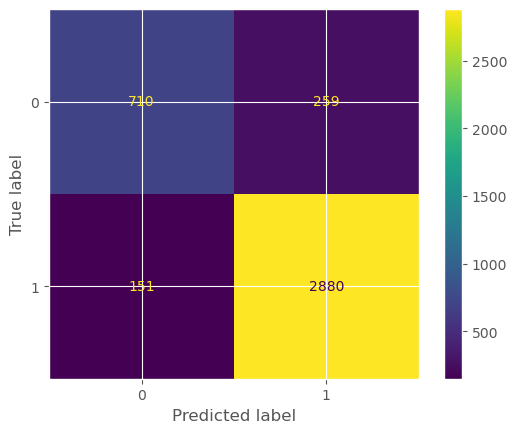

In [60]:
plot_confusion_matrix(sgd_model, x_test, test_labels)

# 5. K-Nearest Neighbors (KNN)

> K-Nearest Neighbors (KNN) is a simple yet powerful supervised machine learning algorithm used for both classification and regression tasks. It predicts the class or value of a new data point based on its proximity to the k nearest labeled data points in the training set.



In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn_model = KNeighborsClassifier(
    n_neighbors = 36
)
start_time = time.time()

knn_model.fit(x_train_tf, train_labels)
y_pred = knn_model.predict(x_test_tf)

end_time = time.time()

inference_time['KNN'] = round(end_time - start_time, 2)
f1_score_val['KNN'] = f1_score(test_labels, y_pred)

In [64]:
print(
    classification_report(
        test_labels.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.81      0.58      0.68       965
    Positive       0.88      0.96      0.92      3035

    accuracy                           0.87      4000
   macro avg       0.85      0.77      0.80      4000
weighted avg       0.86      0.87      0.86      4000



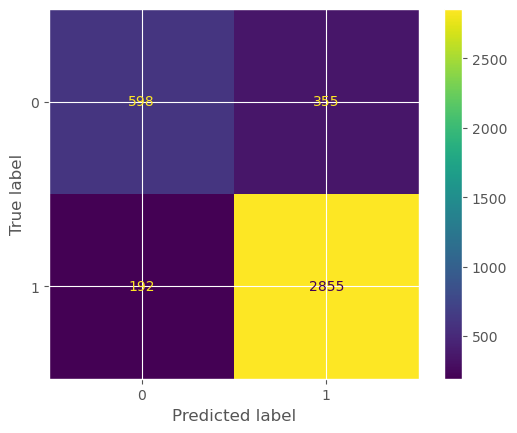

In [65]:
plot_confusion_matrix(knn_model, x_test_tf, test_labels)

## 6. Multinomial Naive Bayes

> Multinomial Naive Bayes is a probabilistic classification algorithm commonly used for text categorization tasks. It assumes that the features are generated from a multinomial distribution and computes the likelihood of each class given the observed feature values.



In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
mnb_model = MultinomialNB(force_alpha = True)
start_time = time.time()

mnb_model.fit(x_train, train_labels)
y_pred =mnb_model.predict(x_test)

end_time = time.time()

inference_time['MNB'] = round(end_time - start_time, 2)
f1_score_val['MNB'] = f1_score(test_labels, y_pred)

In [69]:
print(
    classification_report(
        test_labels.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.83      0.68      0.75       965
    Positive       0.90      0.96      0.93      3035

    accuracy                           0.89      4000
   macro avg       0.87      0.82      0.84      4000
weighted avg       0.89      0.89      0.89      4000



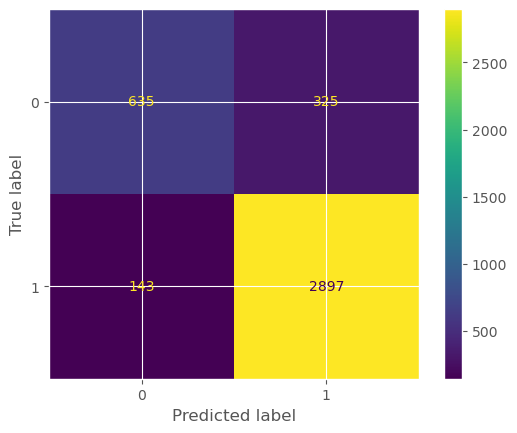

In [70]:
plot_confusion_matrix(mnb_model, x_test, test_labels)

#7. Decision Tree

> Decision Tree is a popular supervised machine learning algorithm used for both classification and regression tasks. It recursively partitions the feature space based on the most informative features, creating a tree-like model to make predictions and interpret decisions.



In [72]:
from sklearn import tree

In [73]:
dtc_model = tree.DecisionTreeClassifier(
    random_state = 1,
)
start_time = time.time()

dtc_model.fit(x_train_tf, train_labels)
y_pred = dtc_model.predict(x_test_tf)

end_time = time.time()

inference_time['DTC'] = round(end_time - start_time, 2)
f1_score_val['DTC'] = f1_score(test_labels, y_pred)

In [74]:
print(
    classification_report(
        test_labels.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.60      0.62      0.61       961
    Positive       0.88      0.87      0.87      3039

    accuracy                           0.81      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.81      0.81      0.81      4000



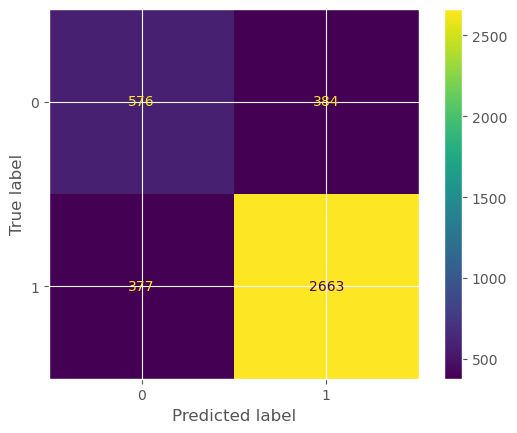

In [75]:
plot_confusion_matrix(dtc_model, x_test_tf, test_labels)

# 8. Complement Naive Bayes

> Complement Naive Bayes is a variant of the Naive Bayes algorithm that addresses the issue of imbalanced class distributions in classification problems. It applies a complementary approach by considering the distribution of features in the complement of each class to make more accurate predictions.



In [77]:
from sklearn.naive_bayes import ComplementNB

In [78]:
cnb_model = ComplementNB(
    force_alpha = True,
)
start_time = time.time()

cnb_model.fit(x_train, train_labels)
y_pred = cnb_model.predict(x_test)

end_time = time.time()

inference_time['cnb'] = round(end_time - start_time, 2)
f1_score_val['cnb'] = f1_score(test_labels, y_pred)

In [79]:
print(
    classification_report(
        test_labels.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77       961
    Positive       0.93      0.92      0.93      3039

    accuracy                           0.89      4000
   macro avg       0.84      0.85      0.85      4000
weighted avg       0.89      0.89      0.89      4000



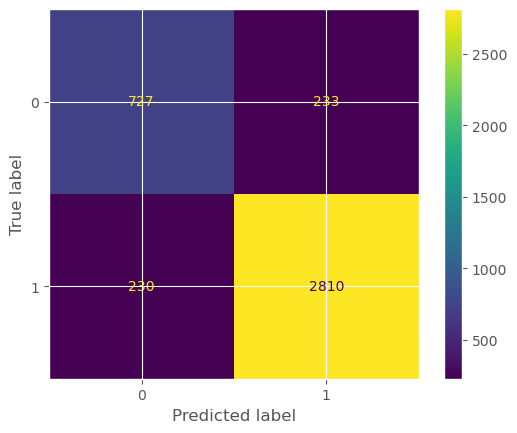

In [80]:
plot_confusion_matrix(cnb_model, x_test, test_labels)

In [82]:
f1_score_val

{'SVM': 0.935304403115562,
 'MLP': 0.9185475956820413,
 ' LogisticRegression': 0.9352884921899904,
 'SGD': 0.9350902879453392,
 'KNN': 0.9160883280757098,
 'MNB': 0.9301729660474054,
 'DTC': 0.8738634485038849,
 'cnb': 0.9253879168042258}

In [84]:
f1_score_val['CNB'] = f1_score_val.pop('cnb')
inference_time['CNB'] = inference_time.pop('cnb')

In [85]:
import matplotlib.cm as cm

# Bar plot of accuracy

<ipython-input-166-b278b73447d2>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


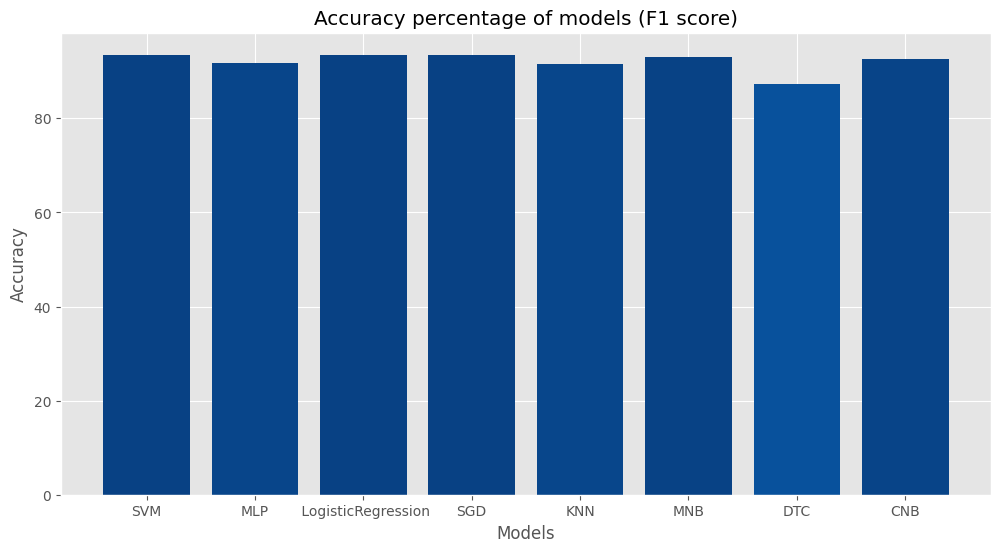

In [86]:
fig = plt.figure(figsize=(12,6))
cmap = cm.get_cmap('Blues')

for i, (model, accuracy) in enumerate(f1_score_val.items()):
  color = cmap(accuracy)
  plt.bar(model, accuracy*100, color=color)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy percentage of models (F1 score)')

plt.show() # display the plot

# Bar plot of inference_time

<ipython-input-167-b5d9f77b90e8>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow')


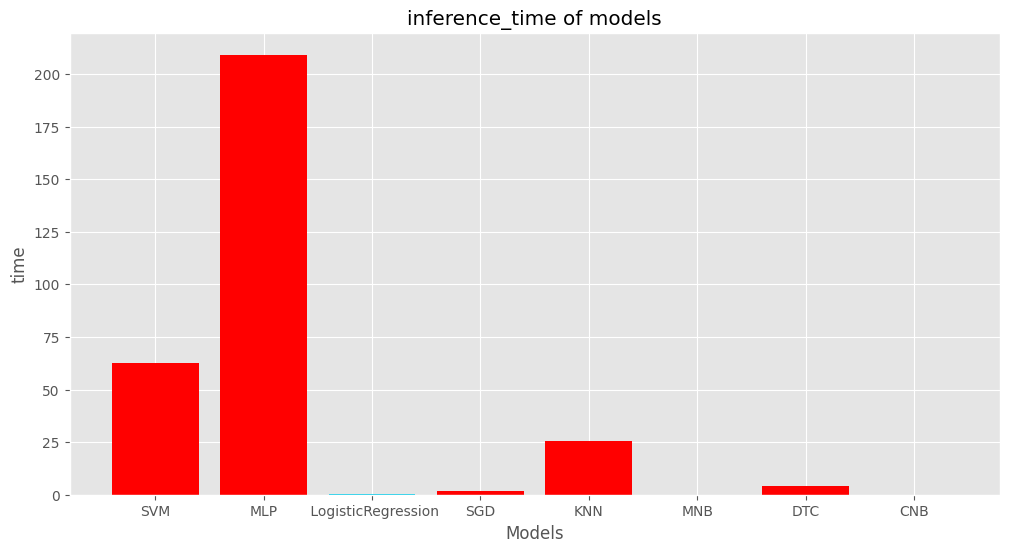

In [87]:
fig = plt.figure(figsize=(12,6))
cmap = cm.get_cmap('rainbow')

for i, (model, time) in enumerate(inference_time.items()):
  color = cmap(time)
  plt.bar(model, time, color=color)

plt.xlabel('Models')
plt.ylabel('time')
plt.title('inference_time of models')

plt.show() # display the plot

# Bar plot of efficiency

<ipython-input-168-600eb44c1465>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('twilight_shifted_r')


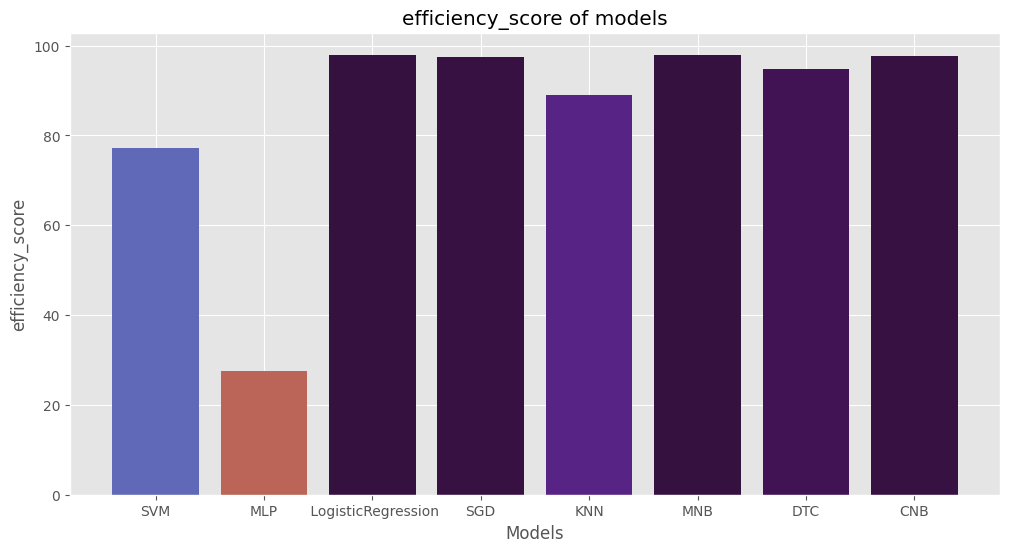

In [88]:
fig = plt.figure(figsize=(12,6))
cmap = cm.get_cmap('twilight_shifted_r')

for i, (model, accuracy) in enumerate(f1_score_val.items()):
  efficiency = efficiency_score(accuracy,inference_time[model],max(inference_time.values()))
  color = cmap(efficiency)
  plt.bar(model, efficiency*100, color=color)

plt.xlabel('Models')
plt.ylabel('efficiency_score')
plt.title('efficiency_score of models')

plt.show() # display the plot

**Conclusion**

>

1. In conclusion, the analysis conducted on different machine learning algorithms has provided valuable insights. It was observed that despite optimizing the parameters of the algorithms, achieving an accuracy of more than 90% was not feasible without employing more complex deep learning models.

2. Furthermore, by fine-tuning various parameters of most models, their accuracy could be increased up to 90%. However, there was no significant difference in performance among these optimized models.

3. Interestingly, it was noted that MLP and SVM models offered comparable accuracy levels to other models but required significantly more processing time. This indicates that these models may not be the most efficient choice for the given dataset.

4. Based on the observations, it can be concluded that logistic regression and stochastic gradient descent (SGD) models demonstrated greater effectiveness in terms of accuracy and computational efficiency. These models achieved satisfactory accuracy rates while minimizing the processing time.

5. To further enhance the prediction, future research could explore the application of more sophisticated deep learning algorithms and investigate additional features or data sources that might contribute to improved accuracy.